<a href="https://colab.research.google.com/github/urvog/weatherclassification/blob/main/WeatherClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Udacity Final Capstone

Project: Weather Image Classifer

In [ ]:
COLAB = True
#!wget https://drive.google.com/file/d/1iNe2qfXzp5PUmnDFPDWlpxgqQAagtB_i/

In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/training/
   creating: dataset/training/cloudy/
  inflating: dataset/training/cloudy/cloudy1.jpg  
  inflating: dataset/training/cloudy/cloudy10.jpg  
  inflating: dataset/training/cloudy/cloudy100.jpg  
  inflating: dataset/training/cloudy/cloudy101.jpg  
  inflating: dataset/training/cloudy/cloudy102.jpg  
  inflating: dataset/training/cloudy/cloudy103.jpg  
  inflating: dataset/training/cloudy/cloudy104.jpg  
  inflating: dataset/training/cloudy/cloudy105.jpg  
  inflating: dataset/training/cloudy/cloudy106.jpg  
  inflating: dataset/training/cloudy/cloudy107.jpg  
  inflating: dataset/training/cloudy/cloudy108.jpg  
  inflating: dataset/training/cloudy/cloudy109.jpg  
  inflating: dataset/training/cloudy/cloudy11.jpg  
  inflating: dataset/training/cloudy/cloudy110.jpg  
  inflating: dataset/training/cloudy/cloudy111.jpg  
  inflating: dataset/training/cloudy/cloudy112.jpg  
  inflating: dataset/training/cloudy/cloudy113.jpg  
  inflating:

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.python.client import device_lib
from keras.utils.vis_utils import model_to_dot


from IPython.display import SVG
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


tf.test.gpu_device_name()
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14829585173692920573
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 16154099712
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10249701388509047314
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
 xla_global_id: 416903419]

## 02 - Data Exploration Analysis (EDA)

## 03 - Image Processing

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 150

# this is the augmentation configuration we will use just for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only for rescaling
validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'dataset/training/',  # this is the target directory
        target_size=(IMAGE_SIZE, IMAGE_SIZE),  # all images will be resized to 150x150
        batch_size=BATCH_SIZE,
        class_mode='categorical')

# this is a similar generator, for validation data
validation_generator = validation_datagen.flow_from_directory(
        'dataset/validation/', #his is the validation directory
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 796 images belonging to 4 classes.
Found 329 images belonging to 4 classes.


## 04 - Model Implementation

### Model 1

In [ ]:
keras.backend.clear_session() #clear model numbers

input_layer = keras.layers.Input(shape=(IMAGE_SIZE,IMAGE_SIZE,3))

#CNN - Convolutional Layers
conv_layer = keras.layers.Conv2D(32, (3,3), activation="relu", padding="same")(input_layer)
conv_layer = keras.layers.Conv2D(16, (3,3), activation="relu", padding="same")(conv_layer)
pooling_layer = keras.layers.MaxPool2D(pool_size=(2,2))(conv_layer)

#FC - Fully connected
flatten = keras.layers.Flatten()(pooling_layer)
dense = keras.layers.Dense(200, activation="relu")(flatten)
dropout = keras.layers.Dropout(0.5)(dense)

classifier = keras.layers.Dense(4, activation="softmax")(dropout)

model = keras.Model(inputs=input_layer, outputs=classifier)
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 16)      4624      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 90000)             0         
                                                                 
 dense (Dense)               (None, 200)               18000200  
                                                             

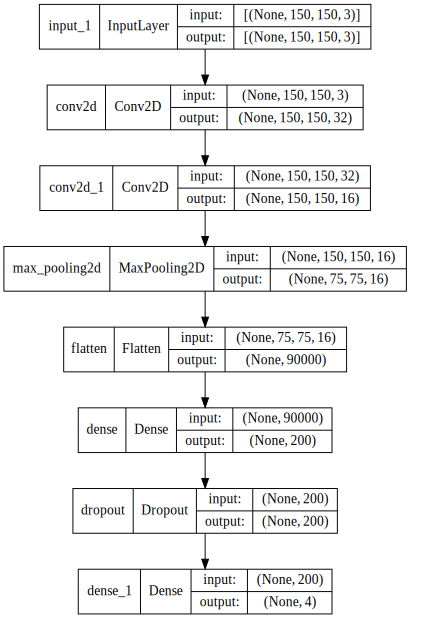

In [ ]:
if COLAB:
    display(SVG(model_to_dot(model, show_shapes=True,dpi=70).create(prog='dot', format='svg')))
else:
    display(SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg')))

Visual Simple Model Architecture

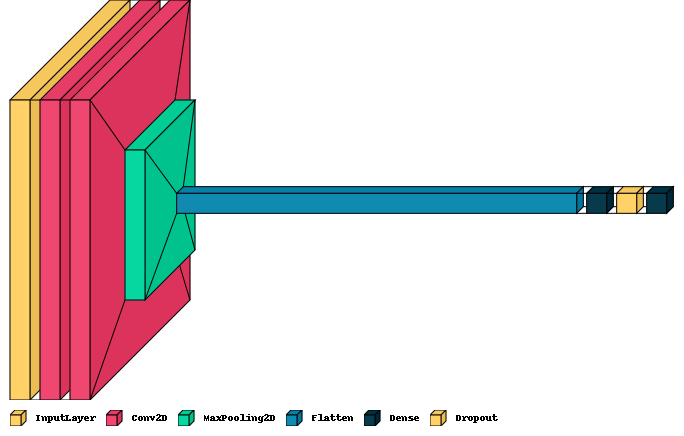

In [ ]:
!pip install visualkeras
import visualkeras

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, legend=True,scale_xy=2)

### Model 2

In [ ]:
keras.backend.clear_session() #clear model numbers

input_layer = keras.layers.Input(shape=(IMAGE_SIZE,IMAGE_SIZE,3))

#CNN - Convolutional Layers
conv_layer = keras.layers.Conv2D(32, (3,3), activation="relu", padding="same")(input_layer)
conv_layer = keras.layers.Conv2D(32, (3,3), activation="relu", padding="same")(conv_layer)
pooling_layer = keras.layers.MaxPool2D(pool_size=(2,2))(conv_layer)

conv_layer = keras.layers.Conv2D(64, (3,3), activation="relu", padding="same")(pooling_layer)
conv_layer = keras.layers.Conv2D(64, (3,3), activation="relu", padding="same")(conv_layer)
pooling_layer = keras.layers.MaxPool2D(pool_size=(2,2))(conv_layer)

#FC - Fully connected
flatten = keras.layers.Flatten()(pooling_layer)
dense = keras.layers.Dense(200, activation="relu")(flatten)
dropout = keras.layers.Dropout(0.5)(dense)
dense = keras.layers.Dense(100, activation="relu")(dropout)
dropout = keras.layers.Dropout(0.2)(dense)

classifier = keras.layers.Dense(4, activation="softmax")(dropout)

model2 = keras.Model(inputs=input_layer, outputs=classifier)
opt = keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=opt, loss="categorical_crossentropy",metrics=['accuracy'])
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                             

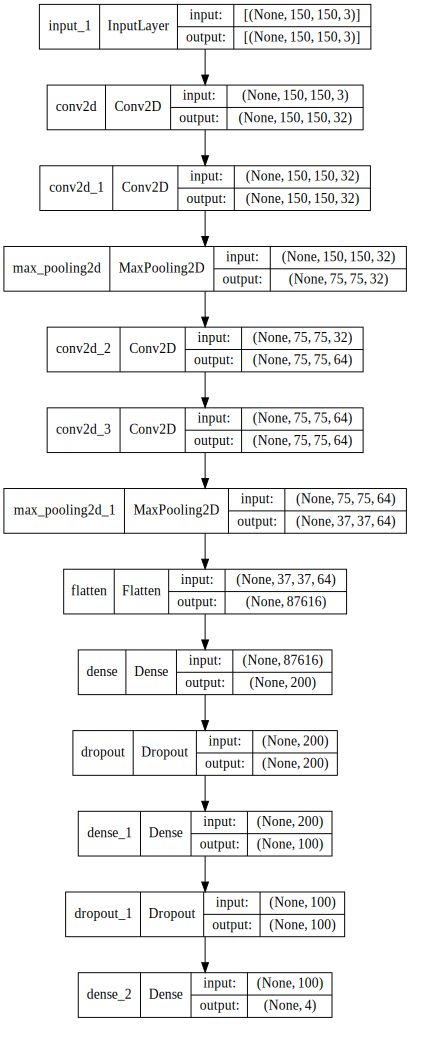

In [ ]:
if COLAB:
    display(SVG(model_to_dot(model2, show_shapes=True,dpi=70).create(prog='dot', format='svg')))
else:
    display(SVG(model_to_dot(model2, show_shapes=True).create(prog='dot', format='svg')))

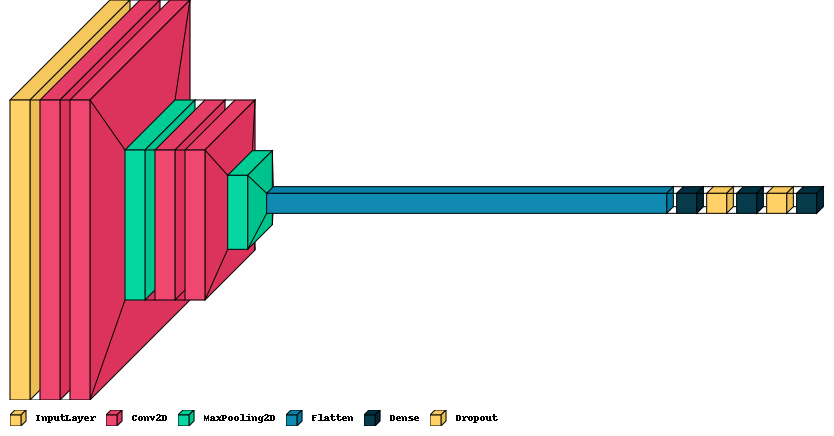

In [ ]:
visualkeras.layered_view(model2).show() # display using your system viewer
visualkeras.layered_view(model2, legend=True,scale_xy=2)

## 05 - Training Model

### Training Model 1

In [ ]:
history1 = model.fit(train_generator,validation_data=validation_generator, epochs=50)

Epoch 1/50
25/25 [==============================] - 11s 400ms/step - loss: 1.3562 - accuracy: 0.5364 - val_loss: 0.6078 - val_accuracy: 0.6778
Epoch 2/50
25/25 [==============================] - 10s 390ms/step - loss: 0.7235 - accuracy: 0.6746 - val_loss: 0.5466 - val_accuracy: 0.7264
Epoch 3/50
25/25 [==============================] - 10s 394ms/step - loss: 0.6296 - accuracy: 0.7249 - val_loss: 0.5576 - val_accuracy: 0.7112
Epoch 4/50
25/25 [==============================] - 10s 398ms/step - loss: 0.5798 - accuracy: 0.7475 - val_loss: 0.5071 - val_accuracy: 0.7812
Epoch 5/50
25/25 [==============================] - 10s 398ms/step - loss: 0.5552 - accuracy: 0.7726 - val_loss: 0.3079 - val_accuracy: 0.9210
Epoch 6/50
25/25 [==============================] - 10s 387ms/step - loss: 0.4612 - accuracy: 0.8166 - val_loss: 0.3983 - val_accuracy: 0.8845
Epoch 7/50
25/25 [==============================] - 10s 388ms/step - loss: 0.4415 - accuracy: 0.8178 - val_loss: 0.5947 - val_accuracy: 0.7812

### Training Model 2

In [ ]:
history2 = model2.fit(train_generator,validation_data=validation_generator, epochs=50)

Epoch 1/50
25/25 [==============================] - 10s 393ms/step - loss: 1.0367 - accuracy: 0.5578 - val_loss: 0.4931 - val_accuracy: 0.7751
Epoch 2/50
25/25 [==============================] - 10s 382ms/step - loss: 0.7668 - accuracy: 0.6771 - val_loss: 0.4912 - val_accuracy: 0.6900
Epoch 3/50
25/25 [==============================] - 10s 384ms/step - loss: 0.6484 - accuracy: 0.7198 - val_loss: 0.5313 - val_accuracy: 0.7508
Epoch 4/50
25/25 [==============================] - 10s 377ms/step - loss: 0.6189 - accuracy: 0.7412 - val_loss: 0.3847 - val_accuracy: 0.8419
Epoch 5/50
25/25 [==============================] - 10s 389ms/step - loss: 0.5622 - accuracy: 0.7889 - val_loss: 0.3779 - val_accuracy: 0.8541
Epoch 6/50
25/25 [==============================] - 10s 388ms/step - loss: 0.4905 - accuracy: 0.8204 - val_loss: 0.4464 - val_accuracy: 0.8267
Epoch 7/50
25/25 [==============================] - 10s 383ms/step - loss: 0.5184 - accuracy: 0.8003 - val_loss: 0.2536 - val_accuracy: 0.9392

## 06 - Loss and Accuracy Plotting

In [ ]:
import matplotlib.pyplot as plt
def plot_curves(history):
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Error')
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.legend(['Training', 'Validation'])

  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.legend(['Training', 'Validation'], loc='lower right');

### Plotting Model Performance 1

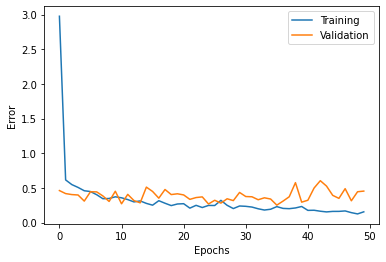

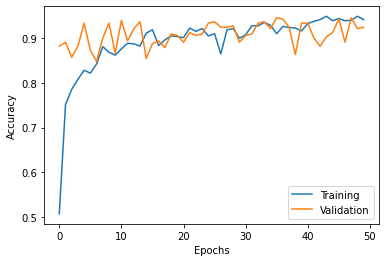

In [ ]:
plot_curves(history1.history)

### Plotting Model Performance 2

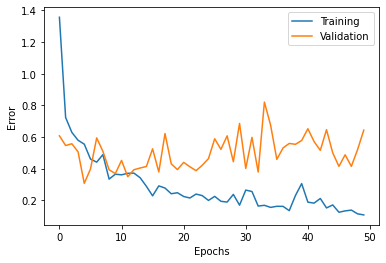

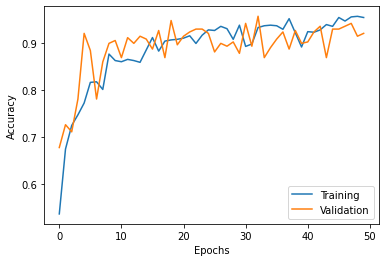

In [ ]:
plot_curves(history1.history)

## 07 - Final Scores

### Scores Model 1

In [ ]:
scores_tr = model.evaluate(train_generator)
print('Train loss    :', scores_tr[0])
print('Train accuracy:', scores_tr[1])

scores_val = model.evaluate(validation_generator)
print('Val loss    :', scores_val[0])
print('Val accuracy:', scores_val[1])

25/25 [==============================] - 9s 359ms/step - loss: 0.1102 - accuracy: 0.9535
Train loss    : 0.11019628494977951
Train accuracy: 0.9535176157951355
11/11 [==============================] - 1s 64ms/step - loss: 0.4544 - accuracy: 0.9240
Val loss    : 0.4543999135494232
Val accuracy: 0.9240121841430664


### Scores Model 2

In [ ]:
scores_tr = model2.evaluate(train_generator)
print('Train loss    :', scores_tr[0])
print('Train accuracy:', scores_tr[1])

scores_val = model2.evaluate(validation_generator)
print('Val loss    :', scores_val[0])
print('Val accuracy:', scores_val[1])

25/25 [==============================] - 9s 350ms/step - loss: 0.0722 - accuracy: 0.9698
Train loss    : 0.07216516882181168
Train accuracy: 0.9698492288589478
11/11 [==============================] - 1s 61ms/step - loss: 0.3845 - accuracy: 0.9392
Val loss    : 0.38449928164482117
Val accuracy: 0.9392096996307373


## 08 - Predictions

In [ ]:
#print classes indices
print(train_generator.class_indices)

{'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}


In [ ]:
def plot_predictions(model):
  fig = plt.figure(figsize=(20, 7))
  rows = 4
  columns = 2
  c = 1
  for i in range(0,4):
    for j in range(0,2):
      idx_img = np.random.randint(200,220)
      if i == 0:
        path = 'dataset/validation/cloudy/cloudy'+str(idx_img)+'.jpg'
      elif i == 1:
        path ='dataset/validation/rain/rain'+str(idx_img)+'.jpg'
      elif i == 2:
        path ='dataset/validation/shine/shine'+str(idx_img)+'.jpg'
      elif i == 3:
        path ='dataset/validation/sunrise/sunrise'+str(idx_img)+'.jpg'

      fig.add_subplot(rows,columns,c)
      img=load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
      x=img_to_array(img)
      x=np.expand_dims(x, axis=0)
      images = np.vstack([x])
      classes = model.predict(images)
      str_predict = "Cloudy: {:.2f}%, Rain: {:.2f}%, shine: {:.2f}%, sunrise: {:.2f}% ".format(classes[0][0]*100,classes[0][1]*100,classes[0][2]*100, classes[0][3]*100)
      plt.imshow(img)
      plt.axis('off')
      plt.title(str_predict)
      c+=1

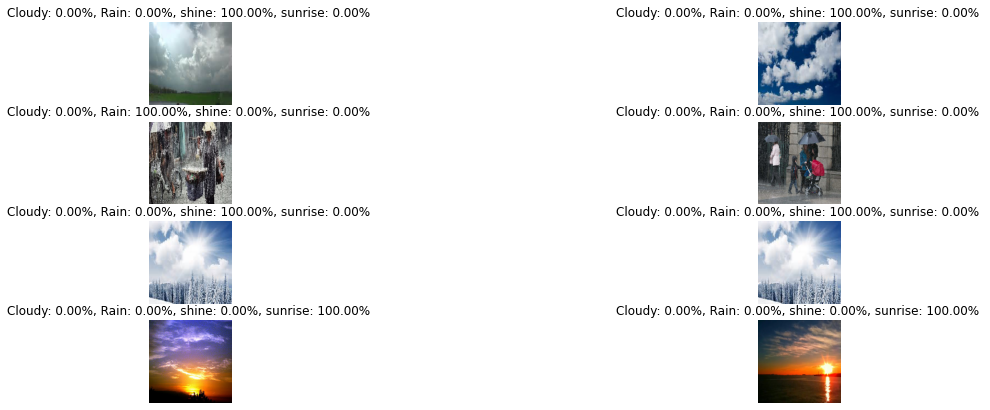

In [ ]:
plot_predictions(model2)

## 09 - Transfer Learning Model

In [ ]:
from tensorflow.keras.applications import VGG16
vgg_base = VGG16(weights='imagenet',    # use weights for ImageNet
                 include_top=False,     # drop the Dense layers!
                 input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
print(vgg16_base.summary())

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [ ]:
keras.backend.clear_session() #clear model numbers

for layer in vgg16_base.layers:
    layer.trainable = False
    
model_t = tf.keras.models.Sequential([
        # our vgg16_base model added as a layer
        vgg16_base,
        # here is our custom prediction layer (same as before)
        keras.layers.Flatten(),        
        keras.layers.Dense(200, activation='relu'),        
        keras.layers.Dense(4, activation='softmax')    
    ])

model_t.compile(optimizer='adam', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model_t.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 200)               1638600   
                                                                 
 dense_1 (Dense)             (None, 4)                 804       
                                                                 
Total params: 16,354,092
Trainable params: 1,639,404
Non-trainable params: 14,714,688
_________________________________________________________________


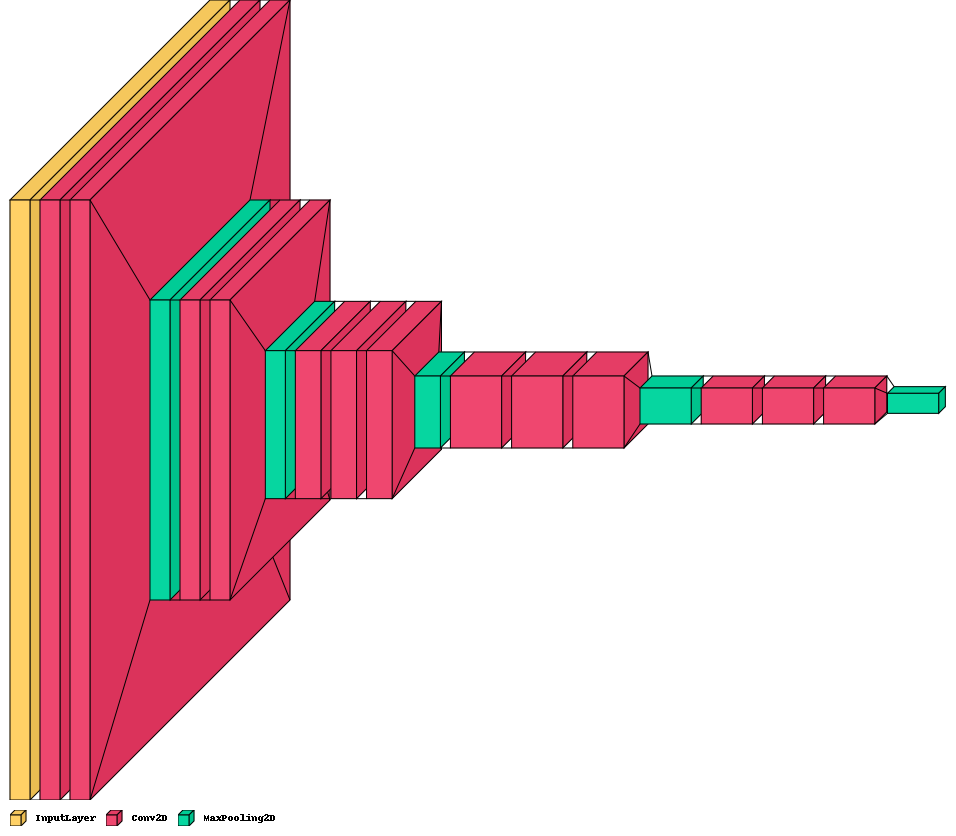

In [ ]:
visualkeras.layered_view(vgg16_base).show() # display using your system viewer
visualkeras.layered_view(vgg16, legend=True,scale_xy=2)

In [ ]:
history2 = model_t.fit(train_generator,validation_data=validation_generator, epochs=50)

Epoch 1/50
25/25 [==============================] - 13s 455ms/step - loss: 0.9536 - accuracy: 0.6633 - val_loss: 0.4376 - val_accuracy: 0.8511
Epoch 2/50
25/25 [==============================] - 10s 395ms/step - loss: 0.3387 - accuracy: 0.8731 - val_loss: 0.3057 - val_accuracy: 0.9027
Epoch 3/50
25/25 [==============================] - 10s 394ms/step - loss: 0.2579 - accuracy: 0.9095 - val_loss: 0.2935 - val_accuracy: 0.9179
Epoch 4/50
25/25 [==============================] - 10s 401ms/step - loss: 0.1802 - accuracy: 0.9309 - val_loss: 0.2061 - val_accuracy: 0.9362
Epoch 5/50
25/25 [==============================] - 10s 394ms/step - loss: 0.1317 - accuracy: 0.9611 - val_loss: 0.2157 - val_accuracy: 0.9362
Epoch 6/50
25/25 [==============================] - 10s 397ms/step - loss: 0.1229 - accuracy: 0.9636 - val_loss: 0.2490 - val_accuracy: 0.9271
Epoch 7/50
25/25 [==============================] - 10s 394ms/step - loss: 0.0988 - accuracy: 0.9648 - val_loss: 0.2246 - val_accuracy: 0.9240

In [ ]:
scores_tr = model_t.evaluate(train_generator)
print('Train loss    :', scores_tr[0])
print('Train accuracy:', scores_tr[1])

scores_val = model_t.evaluate(validation_generator)
print('Val loss    :', scores_val[0])
print('Val accuracy:', scores_val[1])

25/25 [==============================] - 9s 353ms/step - loss: 0.0137 - accuracy: 0.9962
Train loss    : 0.013691489584743977
Train accuracy: 0.9962311387062073
11/11 [==============================] - 1s 77ms/step - loss: 0.2150 - accuracy: 0.9544
Val loss    : 0.2150276154279709
Val accuracy: 0.954407274723053
